### Visualisation of outlier classification

In [1]:
import pandas as pd
import numpy as np
import swifter
import seaborn as sns
pd.set_option('max.rows', None)
pd.set_option('max.columns', None)
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
%matplotlib inline

C:\Users\tom\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
%store -r  X_test_labeled_df

In [3]:
save_plots = True

In [4]:
X_test_labeled_df.head()

,Analysis,Zr90,Ba137,Sr88,Ge72,Cr52,S33,U238,Al27,B11,Mg24,Nd146,Sc45,K39,Pr141,Li7,inlierLabel
0,005_AB_1,0.24,1.06,3.563843,0.80,6.31,487.95,0.210000,306.53,58.850000,25.138079,0.17,1.00,217.05,0.04,19.35,-1
1,006_AB_1,0.30,0.58,1.180000,0.64,4.78,486.15,0.510000,413.97,85.030000,41.100000,0.17,1.25,353.39,0.06,2.61,-1
2,007_AB_1,0.25,0.49,1.250000,0.67,4.62,480.47,0.242569,364.50,80.040000,44.560000,0.24,1.12,329.78,0.07,2.29,1
3,008_AB_2,0.24,4.74,4.350000,0.71,4.46,482.84,0.030000,139.26,70.736204,10.690000,0.63,1.46,90.89,0.20,6.86,-1
4,009_AB_2,0.30,4.22,3.850000,0.98,4.65,506.40,0.060000,180.19,70.736204,18.670000,0.57,1.47,122.66,0.18,8.45,1


## data preproccessing for dimensionality reduction and visualisation

In [5]:
element_data = X_test_labeled_df[X_test_labeled_df.columns.values[1:-1]]
element_data.head()

,Zr90,Ba137,Sr88,Ge72,Cr52,S33,U238,Al27,B11,Mg24,Nd146,Sc45,K39,Pr141,Li7
0,0.24,1.06,3.563843,0.80,6.31,487.95,0.210000,306.53,58.850000,25.138079,0.17,1.00,217.05,0.04,19.35
1,0.30,0.58,1.180000,0.64,4.78,486.15,0.510000,413.97,85.030000,41.100000,0.17,1.25,353.39,0.06,2.61
2,0.25,0.49,1.250000,0.67,4.62,480.47,0.242569,364.50,80.040000,44.560000,0.24,1.12,329.78,0.07,2.29
3,0.24,4.74,4.350000,0.71,4.46,482.84,0.030000,139.26,70.736204,10.690000,0.63,1.46,90.89,0.20,6.86
4,0.30,4.22,3.850000,0.98,4.65,506.40,0.060000,180.19,70.736204,18.670000,0.57,1.47,122.66,0.18,8.45


### features are standardised

In [6]:
my_scaler_train = StandardScaler()


In [7]:
element_data_scaled = my_scaler_train.fit_transform(element_data)


### T-Distributed Stochastic Neighbour Embedding is done 

In [8]:
my_tsne = TSNE(n_components=2, n_iter=5000, verbose=3).fit_transform(element_data_scaled)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 432 samples in 0.001s...
[t-SNE] Computed neighbors for 432 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 432 / 432
[t-SNE] Mean sigma: 1.397358
[t-SNE] Computed conditional probabilities in 0.015s
[t-SNE] Iteration 50: error = 67.6222839, gradient norm = 0.5011413 (50 iterations in 0.142s)


C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\tom\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


[t-SNE] Iteration 100: error = 66.9069443, gradient norm = 0.5386442 (50 iterations in 0.175s)
[t-SNE] Iteration 150: error = 67.5391922, gradient norm = 0.5130489 (50 iterations in 0.157s)
[t-SNE] Iteration 200: error = 67.9224930, gradient norm = 0.5001570 (50 iterations in 0.150s)
[t-SNE] Iteration 250: error = 67.6416245, gradient norm = 0.5120970 (50 iterations in 0.146s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.641624
[t-SNE] Iteration 300: error = 1.0245700, gradient norm = 0.0028098 (50 iterations in 0.109s)
[t-SNE] Iteration 350: error = 0.9536636, gradient norm = 0.0014138 (50 iterations in 0.103s)
[t-SNE] Iteration 400: error = 0.9235075, gradient norm = 0.0016613 (50 iterations in 0.103s)
[t-SNE] Iteration 450: error = 0.9032354, gradient norm = 0.0005105 (50 iterations in 0.103s)
[t-SNE] Iteration 500: error = 0.8878617, gradient norm = 0.0009926 (50 iterations in 0.101s)
[t-SNE] Iteration 550: error = 0.8745812, gradient norm = 0.0006005 (50 

### the t-SNE dimensions are put into a dataframe

In [9]:
tsne_df = pd.DataFrame(data = my_tsne, columns = ['tsne1', 'tsne2'])


### datasets are stored for the purpose of two-dimensional visualisations

In [10]:
tsne_data_with_colour = pd.concat([tsne_df, X_test_labeled_df['inlierLabel']], axis = 1)



In [11]:
tsne_data_with_colour.head()

,tsne1,tsne2,inlierLabel
0,4.973570,18.074112,-1
1,-1.706171,22.413937,-1
2,-0.719270,21.627264,1
3,4.201146,14.070896,-1
4,4.154963,14.075317,1


### visualise t-SNE in two dimensions


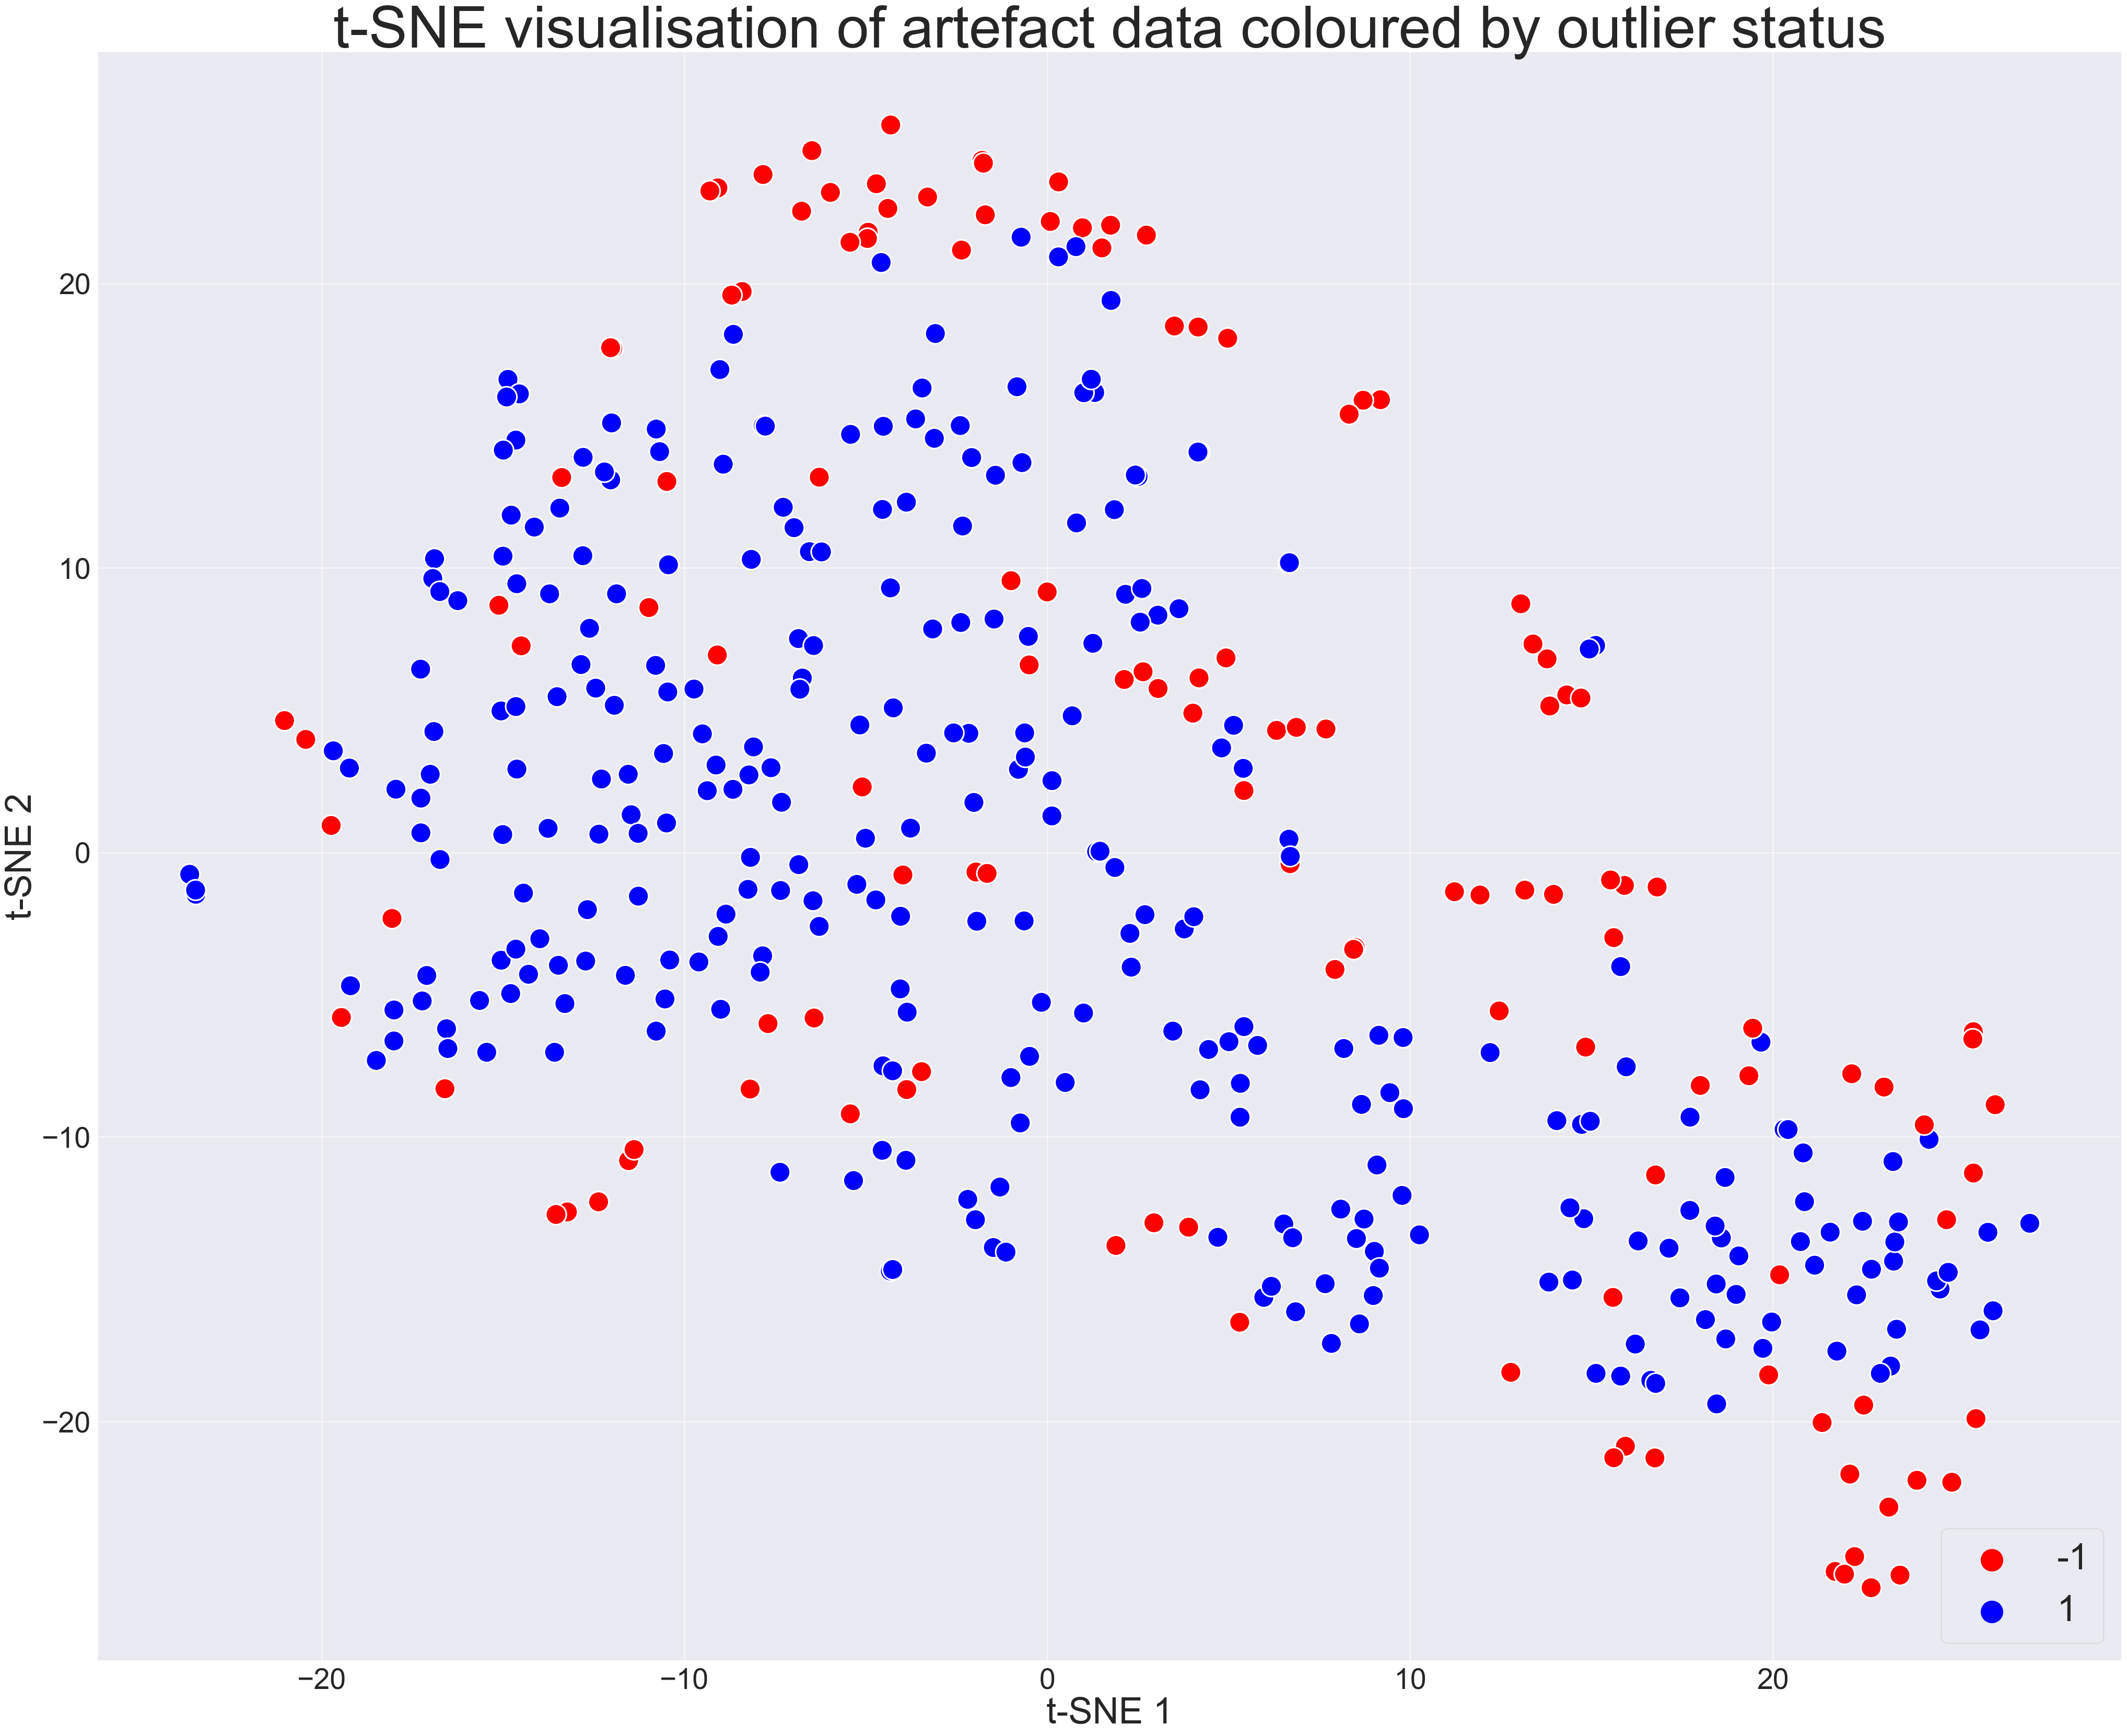

In [12]:
sns.set(rc={'figure.figsize':(50,40)})
plot = sns.scatterplot(data = tsne_data_with_colour, x = 'tsne1', y = 'tsne2', hue='inlierLabel', s = 800, palette = ['red', 'blue'])
plt.title('test', fontsize=70)
plot.set_xlabel("train fold size (number of observations)",fontsize=50)
plot.set_ylabel("t-SNE 2",fontsize=50)
plot.set_xlabel("t-SNE 1",fontsize=50)
plot.tick_params(labelsize=40)
plot.set_title('t-SNE visualisation of artefact data coloured by outlier status', fontdict = {'fontsize': 80})

plt.legend(fontsize = 50, loc = 4, markerscale = 5)

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname='figures/tSNE_outlier_detection')

In [13]:
tsne_data_with_colour.to_csv('output_datasets/tsne_outlier_data.csv')